In [194]:
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt
%matplotlib inline 

In [195]:
plt.style.use('dark_background')

In [196]:
sp.init_printing()

In [197]:
x, nu, t =sp.symbols('x nu t')
phi=(sp.exp(-(x-4*t)**2/(4*nu*(t+1))) + sp.exp(-(x-4*t-2*sp.pi)**2/(4*nu*(t+1))))
phi

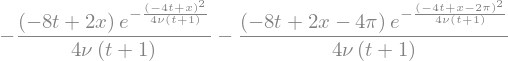

In [198]:
phiprime=phi.diff(x)
phiprime

In [199]:
from sympy.utilities.lambdify import lambdify

In [200]:
u = -2*nu*(phiprime/phi)+4
print(u)

-2*nu*(-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 4*pi)*exp(-(-4*t + x - 2*pi)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)))/(exp(-(-4*t + x - 2*pi)**2/(4*nu*(t + 1))) + exp(-(-4*t + x)**2/(4*nu*(t + 1)))) + 4


In [201]:
u_lamb=lambdify((t, x, nu), u)
print('The value of u at t=1, x=4, nu=3 is {}'.format(u_lamb(1, 4, 3)))

The value of u at t=1, x=4, nu=3 is 3.49170664206445


In [218]:
nx=101
L=2.0*np.pi
dx= L/(nx-1)
nu=0.07
nt=100
sigma=0.1
dt=sigma*dx**2/nu

x=np.linspace(0.0, L, num=nx)

In [219]:
t=0.0
u0=np.array([u_lamb(t, xi, nu) for xi in x])
u0

array([4.        , 4.06283185, 4.12566371, 4.18849556, 4.25132741,
       4.31415927, 4.37699112, 4.43982297, 4.50265482, 4.56548668,
       4.62831853, 4.69115038, 4.75398224, 4.81681409, 4.87964594,
       4.9424778 , 5.00530965, 5.0681415 , 5.13097336, 5.19380521,
       5.25663706, 5.31946891, 5.38230077, 5.44513262, 5.50796447,
       5.57079633, 5.63362818, 5.69646003, 5.75929189, 5.82212374,
       5.88495559, 5.94778745, 6.0106193 , 6.07345115, 6.136283  ,
       6.19911486, 6.26194671, 6.32477856, 6.38761042, 6.45044227,
       6.51327412, 6.57610598, 6.63893783, 6.70176967, 6.76460125,
       6.82742866, 6.89018589, 6.95176632, 6.99367964, 6.72527549,
       4.        , 1.27472451, 1.00632036, 1.04823368, 1.10981411,
       1.17257134, 1.23539875, 1.29823033, 1.36106217, 1.42389402,
       1.48672588, 1.54955773, 1.61238958, 1.67522144, 1.73805329,
       1.80088514, 1.863717  , 1.92654885, 1.9893807 , 2.05221255,
       2.11504441, 2.17787626, 2.24070811, 2.30353997, 2.36637

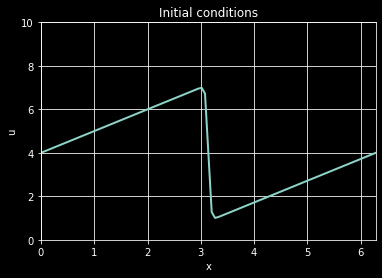

In [220]:
plt.figure(figsize=(6.0, 4.0))
plt.title('Initial conditions')
plt.xlabel('x')
plt.ylabel('u')
plt.grid()
plt.plot(x, u0, color='C0', linestyle='-', linewidth=2)
plt.xlim(0.0, L)
plt.ylim(0.0, 10.0);

In [221]:
u=u0
u=np.tile(u, (nt, 1))

In [222]:
np.shape(u)
for n in range (nt):
    print(u[0]==u[n])

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True 

In [223]:
%%timeit
for n in range(1, nt):
    for i in range(1, nx-1):
        u[n,i]=(u[n-1,i]-u[n-1, i]*dt/dx*(u[n-1, i]-u[n-1, i-1]) + nu*dt/dx**2*(u[n-1, i+1]-2*u[n-1, i]+u[n-1, i-1]))
    u[n,0]=(u[n,0]-u[n,0]*dt/dx*(u[n,0]-u[n,-1])+nu*dt/dx**2*(u[n, 1]-2*u[n, 0]+u[n, -1]))
    u[n,-1]=(u[n,-1]-u[n,-1]*dt/dx*(u[n,-1]-u[n,-2])+nu*dt/dx**2*(u[n, 0]-2*u[n, -1]+u[n, -2]))

51.9 ms ± 4.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [224]:
u_analytical = [np.array([u_lamb(n * dt, xi, nu) for xi in x])
                for n in range(nt)]

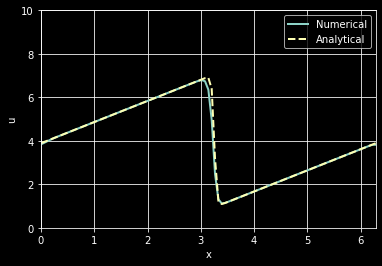

In [225]:
plt.figure(figsize=(6.0, 4.0))
plt.xlabel('x')
plt.ylabel('u')
plt.grid()
plt.plot(x, u[5], label='Numerical',
            color='C0', linestyle='-', linewidth=2)
plt.plot(x, u_analytical[5], label='Analytical',
            color='C1', linestyle='--', linewidth=2)
plt.legend()
plt.xlim(0.0, L)
plt.ylim(0.0, 10.0);

In [226]:
from matplotlib import animation
from IPython.display import HTML

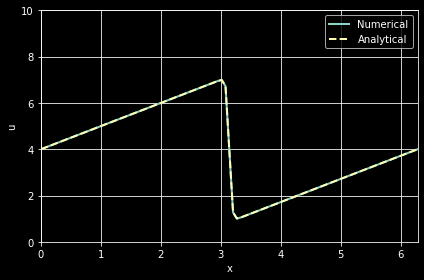

In [227]:
fig = plt.figure(figsize=(6.0, 4.0))
plt.xlabel('x')
plt.ylabel('u')
plt.grid()
line1 = plt.plot(x, u[0], label='Numerical',
                    color='C0', linestyle='-', linewidth=2)[0]
line2 = plt.plot(x, u_analytical[0], label='Analytical',
                    color='C1', linestyle='--', linewidth=2)[0]
plt.legend()
plt.xlim(0.0, L)
plt.ylim(0.0, 10.0)
fig.tight_layout()

In [228]:
def update_plot(n, u, u_analytical):
    fig.suptitle('Time step {:0>2}'.format(n))
    line1.set_ydata(u[n])
    line2.set_ydata(u_analytical[n])

In [229]:
anim = animation.FuncAnimation(fig, update_plot,
                               frames=nt, fargs=(u, u_analytical),
                               interval=100)

In [230]:
HTML(anim.to_html5_video())

In [245]:
%%timeit
u=u0
u=np.tile(u, (nt, 1))
for n in range(1, nt):
    for i in range(1, nx-1):
        u[n,i]=(u[n-1,i]-u[n-1, i]*dt/dx*(u[n-1, i]-u[n-1, i-1]) + nu*dt/dx**2*(u[n-1, i+1]-2*u[n-1, i]+u[n-1, i-1]))
    u[n,0]=(u[n,0]-u[n,0]*dt/dx*(u[n,0]-u[n,-1])+nu*dt/dx**2*(u[n, 1]-2*u[n, 0]+u[n, -1]))
    u[n,-1]=(u[n,-1]-u[n,-1]*dt/dx*(u[n,-1]-u[n,-2])+nu*dt/dx**2*(u[n, 0]-2*u[n, -1]+u[n, -2]))

47 ms ± 581 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [246]:
%%timeit
u=u0
u=np.tile(u, (nt, 1))
for n in range(1, nt):
    u[n,1:-1]=(u[n-1,1:-1]-u[n-1, 1:-1]*dt/dx*(u[n-1, 1:-1]-u[n-1, :-2]) + nu*dt/dx**2*(u[n-1, 2:]-2*u[n-1, 1:-1]+u[n-1, :-2]))
    u[n,0]=(u[n,0]-u[n,0]*dt/dx*(u[n,0]-u[n,-1])+nu*dt/dx**2*(u[n, 1]-2*u[n, 0]+u[n, -1]))
    u[n,-1]=(u[n,-1]-u[n,-1]*dt/dx*(u[n,-1]-u[n,-2])+nu*dt/dx**2*(u[n, 0]-2*u[n, -1]+u[n, -2]))

2.25 ms ± 12.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [247]:
%%timeit
u=u0
for n in range(nt):
    un=u.copy()
    u[1:-1] = (un[1:-1]-un[1:-1] * dt / dx *(un[1:-1] - un[:-2])+nu * dt / dx**2 * (un[2:] - 2 * un[1:-1] + un[:-2]))
    u[0] = (un[0]-un[0] * dt / dx *(un[0] - un[-1])+nu * dt / dx**2 * (un[1] - 2 * un[0] + un[-1]))
    u[-1] = (un[-1]-un[-1] * dt / dx *(un[-1] - un[-2])+nu * dt / dx**2 * (un[0] - 2 * un[-1] + un[-2]))

2.18 ms ± 89.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
